In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data
df = pd.read_csv('prep.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.0,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.0,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.0,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.0,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.0,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes


In [8]:
df = pd.get_dummies(df, drop_first=True)

In [9]:
df

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2.000000,76.459948,3.0,0.0,148.112676,57.482105,3.077356,137.528754,4.627244,12.518156,...,False,False,False,False,False,False,True,True,False,True
1,3.000000,76.459948,2.0,0.0,148.112676,22.000000,0.700000,137.528754,4.627244,10.700000,...,True,False,False,False,False,False,True,False,False,True
2,4.000000,76.459948,1.0,0.0,99.000000,23.000000,0.600000,138.000000,4.400000,12.000000,...,True,False,False,False,False,False,True,False,False,True
3,5.000000,76.459948,1.0,0.0,148.112676,16.000000,0.700000,138.000000,3.200000,8.100000,...,True,False,False,False,False,False,True,False,True,True
4,5.000000,50.000000,0.0,0.0,148.112676,25.000000,0.600000,137.528754,4.627244,11.800000,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,0.0,0.0,219.000000,36.000000,1.300000,139.000000,3.700000,12.500000,...,True,False,False,False,False,False,True,False,False,True
395,51.492308,70.000000,0.0,2.0,220.000000,68.000000,2.800000,137.528754,4.627244,8.700000,...,True,False,False,True,True,False,True,False,True,True
396,51.492308,70.000000,3.0,0.0,110.000000,115.000000,6.000000,134.000000,2.700000,9.100000,...,True,False,False,True,True,False,False,False,False,True
397,51.492308,90.000000,0.0,0.0,207.000000,80.000000,6.800000,142.000000,5.500000,8.500000,...,True,False,False,True,True,False,True,False,True,True


In [10]:
# great now we have the data, let's do some data preprocessing

df = pd.get_dummies(df,  drop_first=True)

X = df.drop(columns=['classification_yes'],axis=1)
y = df['classification_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


      
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 1.0


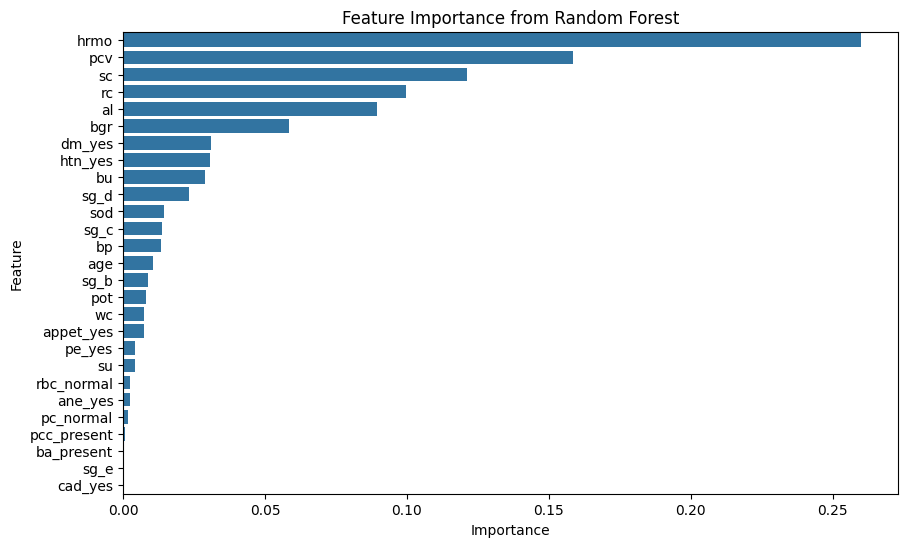

In [11]:
# Feature importance
importances = model.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()